In [1]:
# Dependencies
import os
import csv
import json
import time
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from pprint import pprint
from config import api_key
from citipy import citipy
import matplotlib.pyplot as plt

output_csv = os.path.join("../Resources","")
output_dir = os.path.join("../Figures","")

In [2]:
## Create latitudes and cities lists variables and initialize them as empty lists
cities = []
# Generate a list of cities using a random function up to 1500 in size for scanning
# Note: larger number of cities can be obtained with larger size, however for this task only about 500 are required
latitude = np.random.uniform(low=-90.000, high=90.000, size=2000)
longitude = np.random.uniform(low=-180.000, high=180.000, size=2000)

latitudes_longitudes = zip(latitude, longitude)
count_cities_500 = 0
for latitude_longitude in latitudes_longitudes:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    # If city is not in cities, then append the city to the cities' list. Limit the city list to 500
    if city not in cities:
        if count_cities_500 < 600:
            cities.append(city)
            count_cities_500 += 1
        else:
            break
    else:
        continue
print(f"First five are listed here: {cities[:5]}...")
print(f"Total number of cities is limited to {len(cities)}")

First five are listed here: ['kulhudhuffushi', 'kaitangata', 'kahului', 'bubaque', 'albany']...
Total number of cities is limited to 600


In [3]:
# url for weather api
units = 'english'
url   = "http://api.openweathermap.org/data/2.5/weather?q="
url2  = "http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=metric"
city_5_list      = cities[:5]
city_list        = []
temp_list        = []
temp_list_C      = []
lat_list         = []
long_list        = []
humid_list       = []
cloud_list       = []
wind_list        = []
city_id_list     = []
counter          = 0 # Use this counter to limit amount of calls without sleep
city_id          = 0 # Unique City Identifier number
total_city_count = 1 # Total count for the cities fetched
for city in cities:
    try:
        if counter < 50:
            query_test_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
            response = requests.get(query_test_url).json()
            city_list.append(response["name"])
            city_id = response["id"]
            city_id_list.append(response["id"])
            print(f"| #{total_city_count}: City {city.capitalize()} with ID ({city_id}) is found.")
            temp_K = response["main"]["temp"]
            temp_C = round((temp_K - 273.15), 2)
            temp_list_C.append(temp_C)
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            counter = counter + 1
            total_city_count = total_city_count + 1
        else:
            counter = 0
            time.sleep(2) # sleep for 2 seconds before restarting calling weather API
            print(f"********** Reset counter and wait for 2 seconds **********")
            city_id = response["id"]
            city_id_list.append(response["id"])
            city_list.append(response["name"])
            print(f"| #{total_city_count}: City {city.capitalize()} with ID ({city_id}) is found.")
            temp_K = response["main"]["temp"]
            temp_C = round((temp_K - 273.15), 2)
            temp_list_C.append(temp_C)
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            total_city_count = total_city_count + 1
            continue
    except KeyError:
        print(f"City '{city.capitalize()}' was not found.")
print(f"Temp in DegK: {temp_K} = {temp_C}DegC.")
print("=========================================")
print("Fetching data completed")
print("=========================================")

| #1: City Kulhudhuffushi with ID (1337613) is found.
| #2: City Kaitangata with ID (2208248) is found.
| #3: City Kahului with ID (5847411) is found.
| #4: City Bubaque with ID (2374583) is found.
| #5: City Albany with ID (5106841) is found.
| #6: City Tarabuco with ID (3903391) is found.
| #7: City Tasiilaq with ID (3424607) is found.
| #8: City Punta arenas with ID (3874787) is found.
| #9: City Impfondo with ID (2259655) is found.
| #10: City Norman wells with ID (6089245) is found.
| #11: City Tiksi with ID (2015306) is found.
| #12: City Coquimbo with ID (3893629) is found.
| #13: City Barrow with ID (5880054) is found.
| #14: City Esperance with ID (2071860) is found.
| #15: City Cherskiy with ID (2126199) is found.
| #16: City Chupa with ID (567589) is found.
| #17: City East london with ID (1006984) is found.
| #18: City Zemio with ID (235826) is found.
| #19: City Klaksvik with ID (2618795) is found.
| #20: City Torbay with ID (6167817) is found.
| #21: City Gravdal with ID 

| #155: City Plettenberg bay with ID (964712) is found.
| #156: City Makakilo city with ID (5850554) is found.
| #157: City Cedar city with ID (5536630) is found.
| #158: City Busselton with ID (2075265) is found.
| #159: City Narsaq with ID (3421719) is found.
| #160: City Samoylovka with ID (498956) is found.
| #161: City Bethel with ID (5282297) is found.
| #162: City Umm lajj with ID (100926) is found.
| #163: City Darab with ID (137956) is found.
| #164: City Luderitz with ID (3355672) is found.
| #165: City Calama with ID (3897347) is found.
City 'Sentyabrskiy' was not found.
| #166: City Qaanaaq with ID (3831208) is found.
| #167: City Kodiak with ID (5866583) is found.
| #168: City Kavaratti with ID (1267390) is found.
| #169: City Andenes with ID (3163146) is found.
| #170: City Victoria with ID (1819729) is found.
| #171: City Ampanihy with ID (1078553) is found.
| #172: City Carnarvon with ID (2074865) is found.
| #173: City Bilibino with ID (2126682) is found.
| #174: City 

********** Reset counter and wait for 2 seconds **********
| #306: City Greeneville with ID (545467) is found.
| #307: City Manzhouli with ID (2035836) is found.
| #308: City Muyezerskiy with ID (524100) is found.
City 'Ye' was not found.
| #309: City Goure with ID (2444219) is found.
| #310: City Chakrata with ID (1274886) is found.
| #311: City Abeche with ID (245785) is found.
| #312: City Vila franca do campo with ID (3372472) is found.
| #313: City Ulagan with ID (1488048) is found.
| #314: City High prairie with ID (5975034) is found.
| #315: City Ketchikan with ID (5554428) is found.
| #316: City Kloulklubed with ID (7671223) is found.
| #317: City Coahuayana with ID (4013679) is found.
| #318: City Clyde river with ID (5924351) is found.
| #319: City Dunedin with ID (2191562) is found.
City 'Solovetskiy' was not found.
| #320: City Vancouver with ID (6173331) is found.
| #321: City Nam som with ID (1608462) is found.
| #322: City Tambovka with ID (2015608) is found.
| #323: Cit

City 'Ijaki' was not found.
| #456: City San francisco with ID (5391959) is found.
City 'Attawapiskat' was not found.
| #457: City Ilhabela with ID (3461425) is found.
| #458: City Lagoa with ID (3372964) is found.
********** Reset counter and wait for 2 seconds **********
| #459: City Kailua with ID (3372964) is found.
| #460: City Recreio with ID (3451750) is found.
| #461: City Flinders with ID (6255012) is found.
| #462: City Gashua with ID (2341656) is found.
| #463: City Jining with ID (1805518) is found.
| #464: City Opunake with ID (2206357) is found.
| #465: City Sena madureira with ID (3662155) is found.
City 'Balykshi' was not found.
| #466: City Kalmunai with ID (1242110) is found.
| #467: City Norwich with ID (2641181) is found.
| #468: City Hailar with ID (2037078) is found.
| #469: City Pierre with ID (5767918) is found.
| #470: City Muncar with ID (1634718) is found.
| #471: City Coari with ID (3664539) is found.
| #472: City Livingstone with ID (910111) is found.
City 

In [4]:
# Check the readings of the temperature
query_test_url = f"http://api.openweathermap.org/data/2.5/weather?q=Paris&appid={api_key}"
query_test_url    


'http://api.openweathermap.org/data/2.5/weather?q=Paris&appid=8d3fef753a916acc8df61a629cda8e70'

In [5]:
print(f"There are {len(cities)} cities in the 'cities' list.")

There are 600 cities in the 'cities' list.


In [10]:
# Create a dataframe from the collected data
weather_df = pd.DataFrame({'City': city_list,
                           'Temperature (DegC)': temp_list_C,
                           'Cloudiness (%)': cloud_list,
                           'Latitude': lat_list,
                           'Longitude': long_list,
                           'Humidity (%)': humid_list,
                           'Wind Speed (mps)': wind_list})
weather_df.to_csv(f"{output_csv} weather_data.csv", index = False)
weather_df.head()

,City,Temperature (DegC),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Kulhudhuffushi,29.10,50,6.62,73.07,78,7.29
1,Kaitangata,7.22,0,-46.28,169.85,58,1.79
2,Kahului,24.26,20,20.89,-156.47,51,12.30
3,Bubaque,26.99,94,11.28,-15.83,83,5.03
4,Albany,7.41,7,42.60,-73.97,68,1.75


In [7]:
# Extract data for the northern hemisphere
northern_weather_df = weather_df.loc[weather_df['Latitude'] >= 0]
northern_weather_df.head()

,City,Temperature (DegC),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Kulhudhuffushi,29.10,50,6.62,73.07,78,7.29
2,Kahului,24.26,20,20.89,-156.47,51,12.30
3,Bubaque,26.99,94,11.28,-15.83,83,5.03
4,Albany,7.41,7,42.60,-73.97,68,1.75
6,Tasiilaq,3.00,100,65.61,-37.64,86,8.70


In [8]:
# Extract data for the southern hemisphere
southern_weather_df = weather_df.loc[weather_df['Latitude'] < 0]
southern_weather_df.head()

,City,Temperature (DegC),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
1,Kaitangata,7.22,0,-46.28,169.85,58,1.79
5,Tarabuco,5.38,94,-19.17,-64.92,99,2.09
7,Punta Arenas,1.83,19,-53.15,-70.92,74,5.70
11,Coquimbo,10.00,0,-29.95,-71.34,81,1.00
13,Esperance,17.53,24,-33.87,121.90,65,9.30


In [11]:
# Extract column data to use for a scatter plot
temp_north  = northern_weather_df['Temperature (DegC)']
humid_north = northern_weather_df['Humidity (%)']
cloud_north = northern_weather_df['Cloudiness (%)']
wind_north  = northern_weather_df['Wind Speed (mps)']
lat_north   = northern_weather_df['Latitude']

print(cloud_north[:5])

0     50
2     20
3     94
4      7
6    100
Name: Cloudiness (%), dtype: int64


In [13]:
# Extract data for the Southern hemisphere
temp_south  = southern_weather_df['Temperature (DegC)']
humid_south = southern_weather_df['Humidity (%)']
cloud_south = southern_weather_df['Cloudiness (%)']
wind_south  = southern_weather_df['Wind Speed (mps)']
lat_south   = southern_weather_df['Latitude']

print(cloud_south[:5])

1      0
5     94
7     19
11     0
13    24
Name: Cloudiness (%), dtype: int64


In [14]:
def plot_linear_regression(y_axis, x_axis, title, ylabel, xlabel):
    # Plot temperature vs. latitude for the Northern hemisphere
    plt.scatter(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m, b = np.polyfit(x_axis, y_axis, 1)
    plt.plot(x_axis, m*x_axis + b)
    plt.savefig(f"Figures/{title}.png")
    plt.show()
    # Identify Pearson value
    print(f"Pearson's correlation is = {round(sts.pearsonr(x_axis, y_axis)[0],2)} ({title}).")
#plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear positive correlation between the temperature and the latitude.
This relationship shows that with the latitude approaching 0 deg, which is an equator, 
the temperature is increasing.



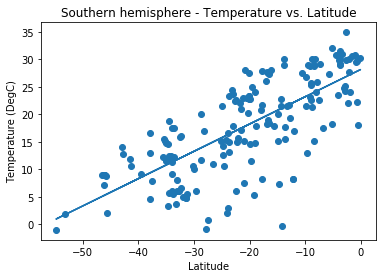

Pearson's correlation is = 0.73 (Southern hemisphere - Temperature vs. Latitude).


In [16]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear positive correlation between the temperature and the latitude.
This relationship shows that with the latitude approaching 0 deg, which is an equator, 
the temperature is increasing.
''')
plot_linear_regression(temp_south, lat_south, "Southern hemisphere - Temperature vs. Latitude", "Temperature (DegC)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear negative correlation between the temperature and the latitude.
This relationship shows that with the latitude moving from 0 deg to the north pole, 
the temperature is decreasing.



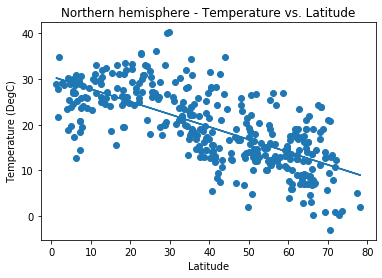

Pearson's correlation is = -0.7 (Northern hemisphere - Temperature vs. Latitude).


In [17]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear negative correlation between the temperature and the latitude.
This relationship shows that with the latitude moving from 0 deg to the north pole, 
the temperature is decreasing.
''')
plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegC)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average cloudiness is about 38%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more sunny days, - with 0% cloudiness. 



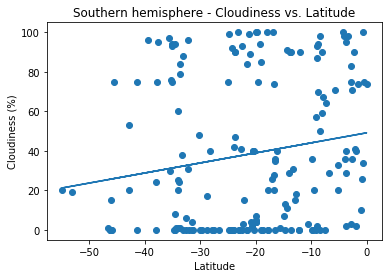

Pearson's correlation is = 0.17 (Southern hemisphere - Cloudiness vs. Latitude).


In [18]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average cloudiness is about 38%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more sunny days, - with 0% cloudiness. 
''')
plot_linear_regression(cloud_south, lat_south, "Southern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average cloudiness is about 45%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more days that are located on the 0 and 100% readings. 



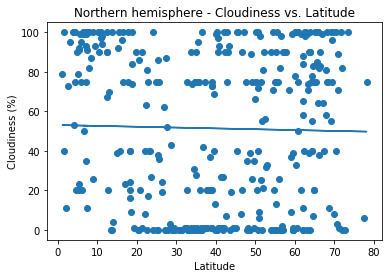

Pearson's correlation is = -0.02 (Northern hemisphere - Cloudiness vs. Latitude).


In [19]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average cloudiness is about 45%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more days that are located on the 0 and 100% readings. 
''')
plot_linear_regression(cloud_north, lat_north, "Northern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")


 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average humidity is about 70%.
When looking at the plot there is no clear correlation.
Humidity is quite high throughout the southern hemisphere



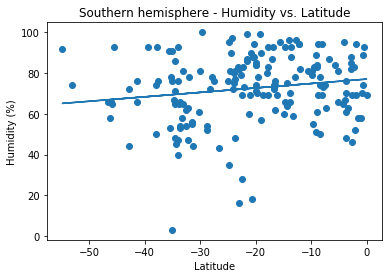

Pearson's correlation is = 0.17 (Southern hemisphere - Humidity vs. Latitude).


In [20]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average humidity is about 70%.
When looking at the plot there is no clear correlation.
Humidity is quite high throughout the southern hemisphere
''')
plot_linear_regression(humid_south, lat_south, "Southern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average humidity is about 65%.
When looking at the plot, there is no clear correlation.
The humidity seems to be more evenly spread in the latitude range between 15 and 40 degrees. 



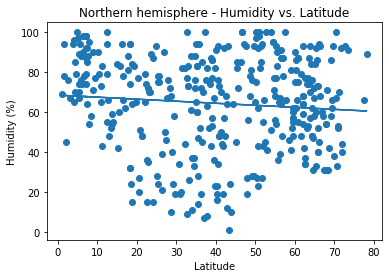

Pearson's correlation is = -0.09 (Northern hemisphere - Humidity vs. Latitude).


In [21]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average humidity is about 65%.
When looking at the plot, there is no clear correlation.
The humidity seems to be more evenly spread in the latitude range between 15 and 40 degrees. 
''')
plot_linear_regression(humid_north, lat_north, "Northern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average wind speed is about 3.3mps.
There are few days where the winds are stronger close to the equator.



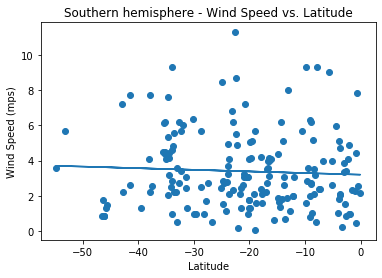

Pearson's correlation is = -0.05 (Southern hemisphere - Wind Speed vs. Latitude).


In [22]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average wind speed is about 3.3mps.
There are few days where the winds are stronger close to the equator.
''')
plot_linear_regression(wind_south, lat_south, "Southern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average wind speed is about 3.8%, 
which is slightly higher than in the Southern hemisphere.



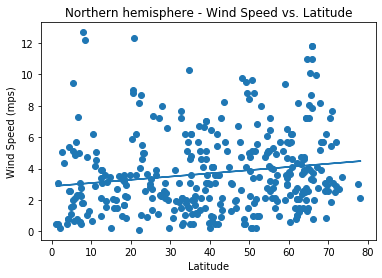

Pearson's correlation is = 0.17 (Northern hemisphere - Wind Speed vs. Latitude).


In [23]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average wind speed is about 3.8%, 
which is slightly higher than in the Southern hemisphere.
''')
plot_linear_regression(wind_north, lat_north, "Northern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")